In [1]:
import pandas as pd
import numpy as np
#from plotnine import *
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
    
import statsmodels.api as sm

from scipy.stats import mode

import random
 
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\binomial_target.xlsx')

In [3]:
#training, test = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df))])
training, test  = train_test_split(df, test_size=0.2, random_state=42)
X = training.iloc[:,:-1]
y = training.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_true = test.iloc[:,-1]

In [4]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_true.shape)

(35064, 63)
(35064,)
(8766, 63)
(8766,)


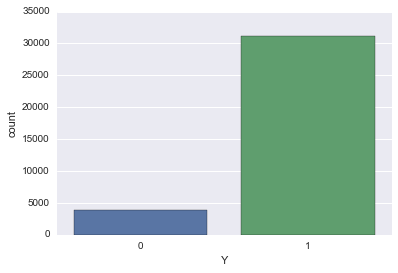

In [5]:
sns.countplot(x="Y", data=training)

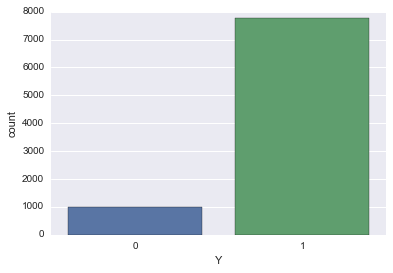

In [6]:
sns.countplot(x="Y", data=test)

In [43]:
def wake_svc(X, y, X_test, y_true):
    #Lkappa_l1 = []
    Lkappa_l2 = []
    Lkappa_poly = []
    Lrecall_l2 = []
    Lrecall_poly = []
    Lprecision_l2 = []
    Lprecision_poly = []
    L = [0.00000001,0.0000001, 0.000001, 0.00001, 0.0001, 0.01, 1, 100]
    for C in L: 
        l2_Lsvc = LinearSVC(C=C, penalty='l2', loss="hinge")
        poly_svc = SVC(C=C, kernel="poly", degree=2, coef0=1)
        l2_Lsvc.fit(X, y)
        poly_svc.fit(X, y)
        y_pred_l2 = l2_Lsvc.predict(X_test)
        y_pred_poly = poly_svc.predict(X_test)
        kappa_l2 = cohen_kappa_score(y_true, y_pred_l2)
        kappa_poly = cohen_kappa_score(y_true, y_pred_poly)
        Lrecall_l2.append(recall_score(y_true, y_pred_l2))
        Lrecall_poly.append(recall_score(y_true, y_pred_poly))
        Lprecision_l2.append(precision_score(y_true, y_pred_l2))
        Lprecision_poly.append(precision_score(y_true, y_pred_poly))
        Lkappa_l2.append(kappa_l2)
        Lkappa_poly.append(kappa_poly)
        
    ##########
    fig, ax = plt.subplots()
    plt.subplot(1,2, 1)
    ax.set_title("Precision (red) & recall (blue) vs C for l2")
    ax.semilogx(L, Lprecision_l2, color='r', label="Precision", linestyle="-")
    ax.semilogx(L, Lrecall_l2, color='b', label = "Recall", linestyle="-")
    plt.legend()
    
    plt.subplot(1,2, 2)
    ax.set_title("Precision (red) & recall (blue) vs C for poly")
    ax.semilogx(L, Lprecision_poly, color='r', label="Precision", linestyle="-")
    ax.semilogx(L, Lrecall_poly, color='b', label = "Recall", linestyle="-")
    plt.legend()
    plt.show()
               
    fig, ax = plt.subplots()
    ax.set_title("kappa vs C for l2")
    ax.semilogx(L, Lkappa_l2, color="r", label = "kappa l2", linestyle="-")
    ax.semilogx(L, Lkappa_poly, color = "b", label = "Kappa polynomial Kernel", linestyle="-")
    plt.legend()
    plt.show()
    return [Lkappa_l2, Lkappa_poly]

In [44]:
#wake_svc(X, y, X_test, y_true)

In [45]:
scaler = StandardScaler()
scaler.fit(X) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

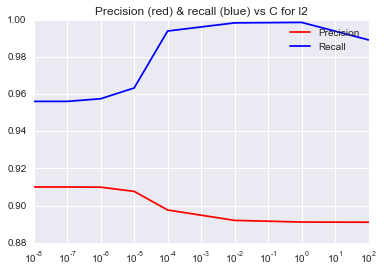

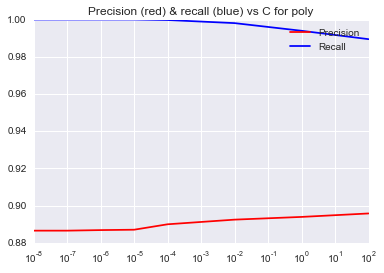

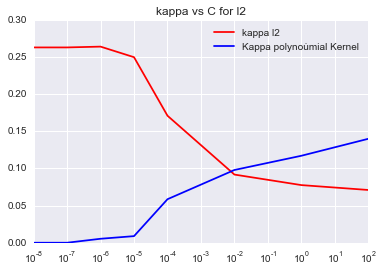

[[0.2624994512285528,
  0.2624994512285528,
  0.2635950852473887,
  0.24938045973686873,
  0.1707014402006053,
  0.09161016866217431,
  0.07746081596114174,
  0.07089995563970342],
 [0.0,
  0.0,
  0.005333258297571142,
  0.008875006424129639,
  0.05849228193376255,
  0.09779347956799123,
  0.11691149807141066,
  0.13972514620705423]]

In [40]:
wake_svc(X_scaled, y, X_test_scaled, y_true)

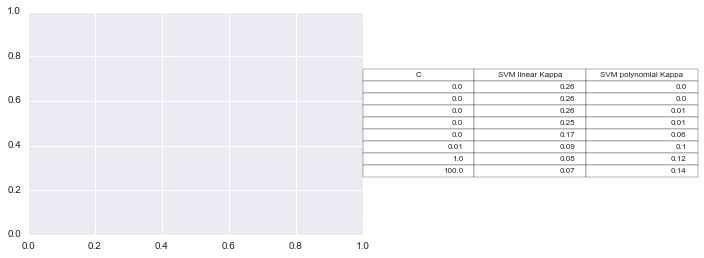

In [56]:
Lk1 = [0.2624994512285528,
  0.2624994512285528,
  0.2635950852473887,
  0.24938045973686873,
  0.1707014402006053,
  0.09161016866217431,
  0.07746081596114174,
  0.07089995563970342]

Lk2 = [0.0,
  0.0,
  0.005333258297571142,
  0.008875006424129639,
  0.05849228193376255,
  0.09779347956799123,
  0.11691149807141066,
  0.13972514620705423]
L = [0.00000001,0.0000001, 0.000001, 0.00001, 0.0001, 0.01, 1, 100]

tab = {'C': L, 'SVM linear Kappa': Lk1, "SVM polynomial Kappa": Lk2}
ddf = pd.DataFrame(data=tab)

plt.table(cellText= np.round(ddf.values, 2),
          #rowLabels=ddf.index,
          colLabels=ddf.columns,
          cellLoc = 'right', rowLoc = 'center',
          loc='right') #, bbox=[.65,.05,.3,.5])

plt.savefig("out.png")
plt.show()

In [46]:
def wake_svc_rbf(X, y, X_test, y_true, gamma = [0.01, 0.1, 1, 5, 100], L = [0.0000001, 0.000001, 0.00001, 0.0001, 0.01, 1, 100]):
    for g in gamma:
        print("gamma: " + str(g))
        Lkappa = []
        Lrecall = []
        Lprecision = []
        for C in L: 
            #print ("C: " + str(C))
            model_svc =SVC(kernel="rbf", gamma=g, C=C)
            model_svc.fit(X, y)
            y_pred = model_svc.predict(X_test)
            Lrecall.append(recall_score(y_true, y_pred))
            Lprecision.append(precision_score(y_true, y_pred))
            Lkappa.append(cohen_kappa_score(y_true, y_pred))
    ####
        fig, ax = plt.subplots()
        ax.set_title("Precision (red) & recall (blue) vs C with gamma =" + str(g))
        ax.semilogx(L, Lprecision, color='r', label="Precision", linestyle="-")
        ax.semilogx(L, Lrecall, color='b', label="Recall", linestyle="-")
        plt.legend()
        plt.show()
                   
        fig, ax = plt.subplots()
        ax.set_title("kappa vs C with gamma ="  + str(g))
        ax.semilogx(L, Lkappa)
        plt.show()
    return Lkappa

gamma: 0.01


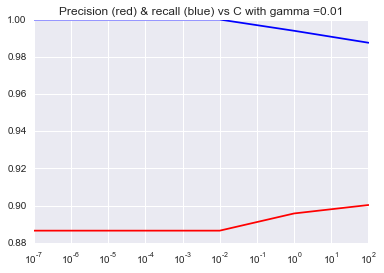

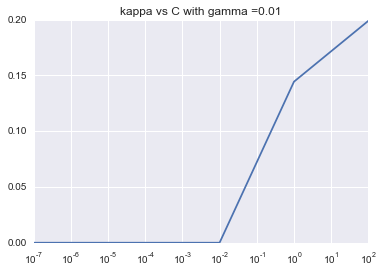

gamma: 0.1


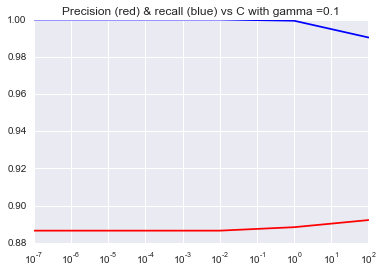

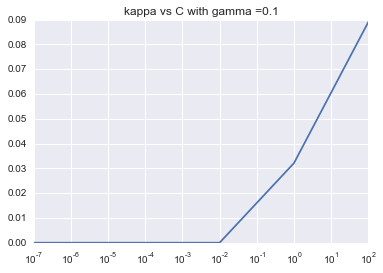

gamma: 1


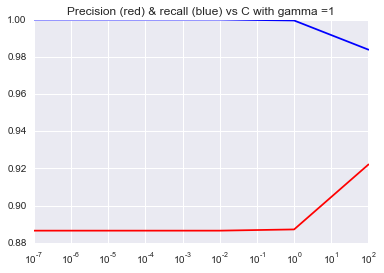

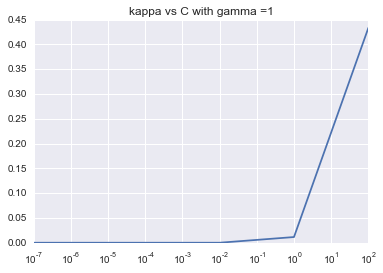

gamma: 5


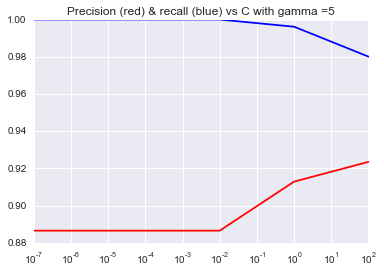

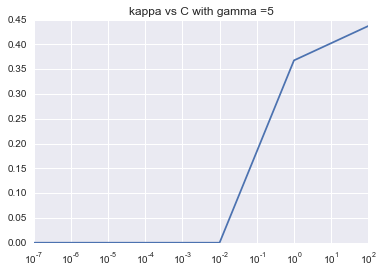

gamma: 100


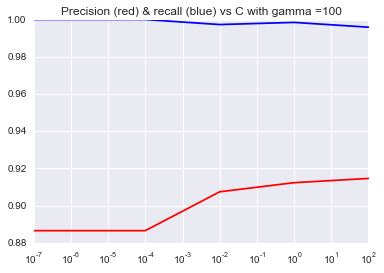

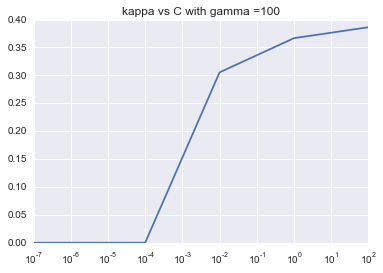

[0.0,
 0.0,
 0.0,
 0.0,
 0.3053428543824054,
 0.366617651852983,
 0.38617282723156976]

In [42]:
wake_svc_rbf(X_scaled, y, X_test_scaled, y_true)

gamma: 1
C: 0.1
C: 1
C: 10
C: 100
C: 200


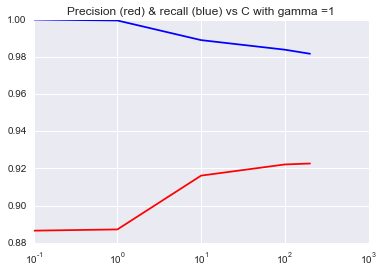

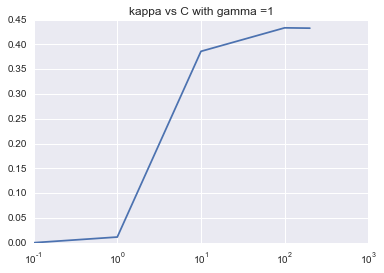

gamma: 3
C: 0.1
C: 1
C: 10
C: 100
C: 200


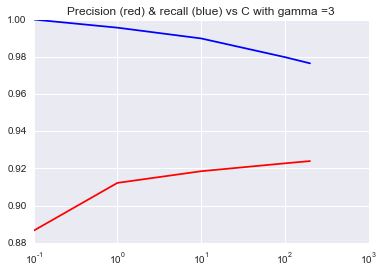

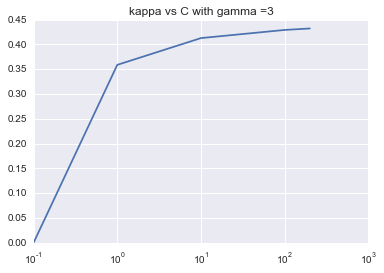

gamma: 5
C: 0.1
C: 1
C: 10
C: 100
C: 200


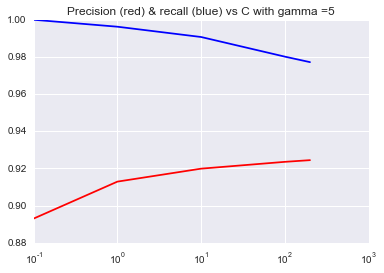

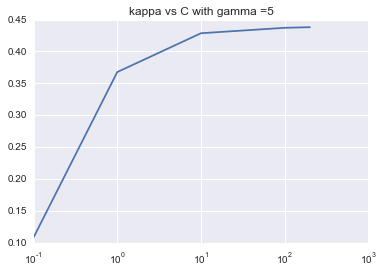

gamma: 10
C: 0.1
C: 1
C: 10
C: 100
C: 200


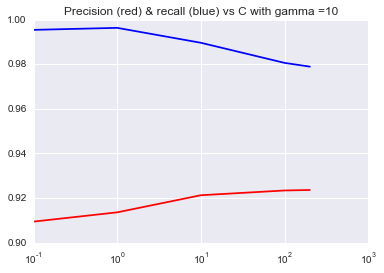

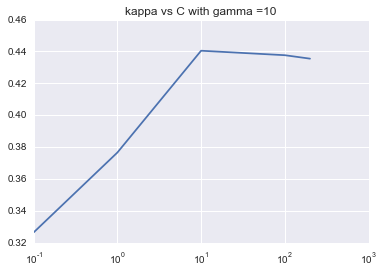

gamma: 20
C: 0.1
C: 1
C: 10
C: 100
C: 200


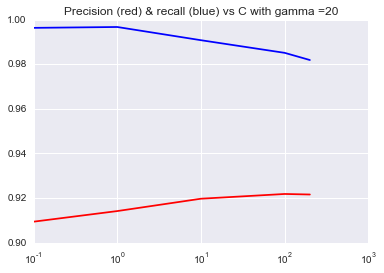

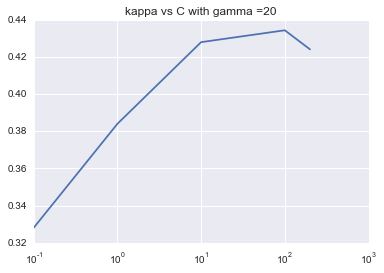

gamma: 50
C: 0.1
C: 1
C: 10
C: 100
C: 200


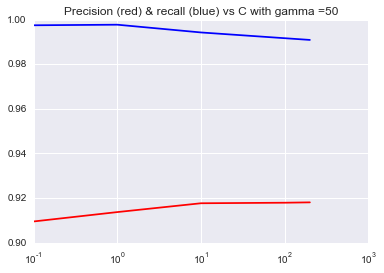

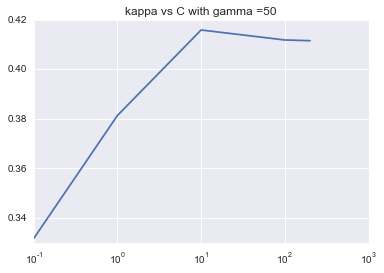

[0.3317048196359236,
 0.3812949206990327,
 0.41578165126976785,
 0.4117546123349578,
 0.4114732733678562]

In [26]:
wake_svc_rbf(X_scaled, y, X_test_scaled, y_true, [1,  3,  5,  10,  20, 50], [0.1, 1, 10, 100, 200])

In [27]:
X.columns

Index(['mean_eeg_1', 'std_eeg_1', 'min_eeg_1', 'max_eeg_1', '25%_eeg_1',
       '50%_eeg_1', '75%_eeg_1', 'mean_eeg_2', 'std_eeg_2', 'min_eeg_2',
       'max_eeg_2', '25%_eeg_2', '50%_eeg_2', '75%_eeg_2', 'mean_eeg_3',
       'std_eeg_3', 'min_eeg_3', 'max_eeg_3', '25%_eeg_3', '50%_eeg_3',
       '75%_eeg_3', 'mean_eeg_4', 'std_eeg_4', 'min_eeg_4', 'max_eeg_4',
       '25%_eeg_4', '50%_eeg_4', '75%_eeg_4', 'mean_po_ir', 'std_po_ir',
       'min_po_ir', 'max_po_ir', '25%_po_ir', '50%_po_ir', '75%_po_ir',
       'mean_po_r', 'std_po_r', 'min_po_r', 'max_po_r', '25%_po_r', '50%_po_r',
       '75%_po_r', 'mean_accelerometer_x', 'std_accelerometer_x',
       'min_accelerometer_x', 'max_accelerometer_x', '25%_accelerometer_x',
       '50%_accelerometer_x', '75%_accelerometer_x', 'mean_accelerometer_y',
       'std_accelerometer_y', 'min_accelerometer_y', 'max_accelerometer_y',
       '25%_accelerometer_y', '50%_accelerometer_y', '75%_accelerometer_y',
       'mean_accelerometer_z', 'std_acce

In [31]:
X['min_eeg_1'].min()


-7052074.0

In [32]:
X['max_eeg_1'].max()

5545847.0